## Instalamos Paquetes

In [2]:
#Instalamos paquetes para agrupar csv
install.packages("data.table",repos = "http://cran.us.r-project.org")
#Intslamos paquete para manipular ts
install.packages("xts",repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/manu_/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\manu_\AppData\Local\Temp\RtmpaqyhGN\downloaded_packages


Installing package into 'C:/Users/manu_/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'xts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\manu_\AppData\Local\Temp\RtmpaqyhGN\downloaded_packages


## Carga Datos Calidad del aire 2001-2018

In [3]:
#Cargamos los datos de los anos en un dataset (utilziamos read.csv ya que el separador es,)
data2001<- read.csv(file = "data/madrid_2001.csv",header = TRUE);
data2002<- read.csv(file = "data/madrid_2002.csv",header = TRUE);
data2003<- read.csv(file = "data/madrid_2003.csv",header = TRUE);
data2004<- read.csv(file = "data/madrid_2004.csv",header = TRUE);
data2005<- read.csv(file = "data/madrid_2005.csv",header = TRUE);
data2006<- read.csv(file = "data/madrid_2006.csv",header = TRUE);
data2007<- read.csv(file = "data/madrid_2007.csv",header = TRUE);
data2008<- read.csv(file = "data/madrid_2008.csv",header = TRUE);
data2009<- read.csv(file = "data/madrid_2009.csv",header = TRUE);
data2010<- read.csv(file = "data/madrid_2010.csv",header = TRUE);
data2011<- read.csv(file = "data/madrid_2011.csv",header = TRUE);
data2012<- read.csv(file = "data/madrid_2012.csv",header = TRUE);
data2013<- read.csv(file = "data/madrid_2013.csv",header = TRUE);
data2014<- read.csv(file = "data/madrid_2014.csv",header = TRUE);
data2015<- read.csv(file = "data/madrid_2015.csv",header = TRUE);
data2016<- read.csv(file = "data/madrid_2016.csv",header = TRUE);
data2017<- read.csv(file = "data/madrid_2017.csv",header = TRUE);
data2018<- read.csv(file = "data/madrid_2018.csv",header = TRUE);

In [4]:
#unimos los datos en una lista para luego introducirla en un dataset
data <- data.table::rbindlist(list(data2001,data2002,data2003,data2004,data2005,data2006,data2007,data2008,data2009,data2010,data2011,data2012,
data2013,data2014,data2015,data2016,data2017,data2018), fill = TRUE);
datasetMadrid <- as.data.frame(data); 

In [5]:
##observamos que todos los datos se han unido, aplicando head y tail al dataset para ver cuando empiezan y acaban fechas
head(datasetMadrid)

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
2001-08-01 01:00:00,NA,0.37,NA,NA,NA,58.40,87.15,NA,34.53,105.00,NA,6.34,NA,NA,28079001,NA,NA,NA
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,28079035,NA,NA,NA
2001-08-01 01:00:00,NA,0.28,NA,NA,NA,50.66,61.38,NA,46.31,100.10,NA,7.85,NA,NA,28079003,NA,NA,NA
2001-08-01 01:00:00,NA,0.47,NA,NA,NA,69.79,73.45,NA,40.65,69.78,NA,6.46,NA,NA,28079004,NA,NA,NA
2001-08-01 01:00:00,NA,0.39,NA,NA,NA,22.83,24.80,NA,66.31,75.18,NA,8.80,NA,NA,28079039,NA,NA,NA
2001-08-01 01:00:00,2.11,0.63,2.48,5.94,0.05,66.26,118.10,3.15,33.50,122.70,2.29,6.36,1.23,13.28,28079006,NA,NA,NA


In [6]:
tail(datasetMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,1.3,NA,1.2,NA,0.13,94,190,NA,NA,35,NA,NA,1.68,5.2,28079055,NA,63,1.55
3808220,2018-02-01 00:00:00,NA,0.5,NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,0.7,NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


## Carga Datos Precipitaciones 2001-2018

In [7]:
#Cargamos los datos de las precipitaciones
rainfall_2001<- readxl::read_xlsx("data/rainfall_2001.xlsx",col_names = TRUE);
rainfall_2002<- readxl::read_xlsx("data/rainfall_2002.xlsx",col_names = TRUE);
rainfall_2003<- readxl::read_xlsx("data/rainfall_2003.xlsx",col_names = TRUE);
rainfall_2004<- readxl::read_xlsx("data/rainfall_2004.xlsx",col_names = TRUE);
rainfall_2005<- readxl::read_xlsx("data/rainfall_2005.xlsx",col_names = TRUE);
rainfall_2006<- readxl::read_xlsx("data/rainfall_2006.xlsx",col_names = TRUE);
rainfall_2007<- readxl::read_xlsx("data/rainfall_2007.xlsx",col_names = TRUE);
rainfall_2008<- readxl::read_xlsx("data/rainfall_2008.xlsx",col_names = TRUE);
rainfall_2009<- readxl::read_xlsx("data/rainfall_2009.xlsx",col_names = TRUE);
rainfall_2010<- readxl::read_xlsx("data/rainfall_2010.xlsx",col_names = TRUE);
rainfall_2011<- readxl::read_xlsx("data/rainfall_2011.xlsx",col_names = TRUE);
rainfall_2012<- readxl::read_xlsx("data/rainfall_2012.xlsx",col_names = TRUE);
rainfall_2013<- readxl::read_xlsx("data/rainfall_2013.xlsx",col_names = TRUE);
rainfall_2014<- readxl::read_xlsx("data/rainfall_2014.xlsx",col_names = TRUE);
rainfall_2015<- readxl::read_xlsx("data/rainfall_2015.xlsx",col_names = TRUE);
rainfall_2016<- readxl::read_xlsx("data/rainfall_2016.xlsx",col_names = TRUE);
rainfall_2017<- readxl::read_xlsx("data/rainfall_2017.xlsx",col_names = TRUE);
rainfall_2018<- readxl::read_xlsx("data/rainfall_2018.xlsx",col_names = TRUE);

In [8]:
rainfall <- data.table::rbindlist(list(rainfall_2001,rainfall_2002,rainfall_2003,rainfall_2004,
              rainfall_2005,rainfall_2006,rainfall_2007,rainfall_2008,rainfall_2009,rainfall_2010,
              rainfall_2011,rainfall_2012,rainfall_2013,rainfall_2014,rainfall_2015,rainfall_2016,
rainfall_2017,rainfall_2018), fill = TRUE)
datasetRainfall <- as.data.frame(rainfall);

In [9]:
##observamos que todos los datos se han unido, aplicando head y tail al dataset para ver cuando empiezan y acaban fechas
head(datasetRainfall)

FECHA,Precipitación: l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0


In [10]:
tail(datasetRainfall)

,FECHA,Precipitación: l/m2
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


In [11]:
#Liberamos memoria de los datos 
rm(list=ls(pat="20"))
rm(data)

## Limpieza de datos

In [31]:
#Limpieza de datos datasetMadrid
#1) Calculamos el porcenje de NA para descartar aquellas columnas cuyo porcentage sea muy alto
naPerColumn <- colSums(is.na(datasetMadrid))
#2) Todos los gases tienen al menos un NA por , tanto, estudiamos gases a descartar, para ello
#quitamos los demás parámetros
percentageNA <- naPerColumn/nrow(datasetMadrid) *100
percentageNA <- percentageNA[percentageNA > 0]
percentageNA

BEN         CO        EBE        MXY       NMHC       NO_2        NOx 
72.6464620 30.3871831 73.6957700 91.7175303 71.5008361  0.5560072 37.6014909 
       OXY        O_3       PM10        PXY       SO_2        TCH        TOL 
91.7101778 21.4402304 24.8664207 91.7130925 27.1061786 71.4711897 72.7188054 
      PM25         NO        CH4 
78.5615552 59.7608492 99.6100545

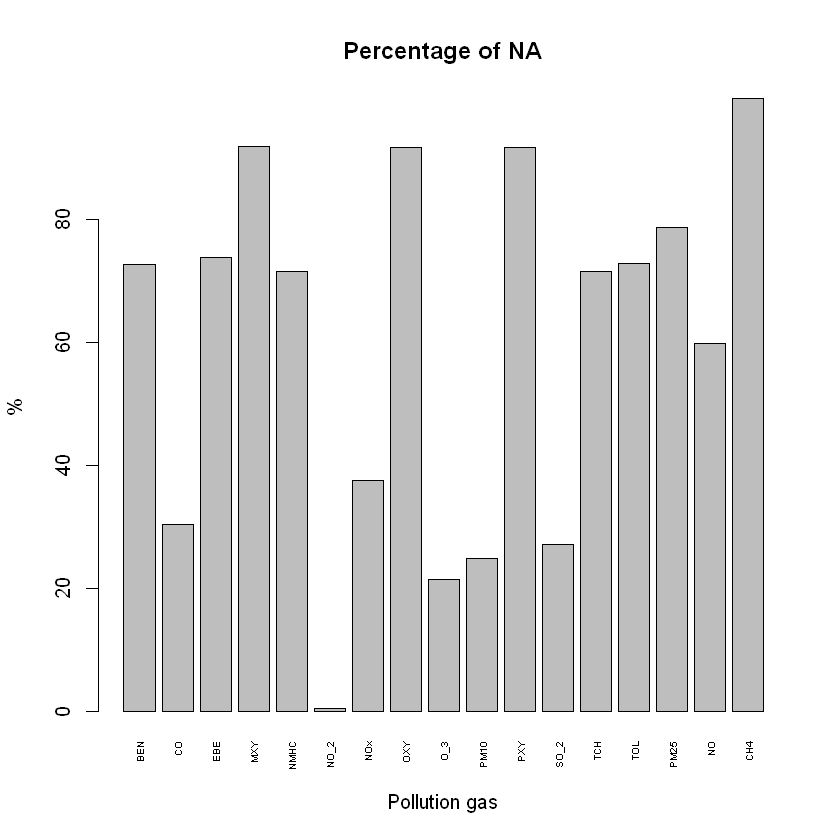

In [32]:
#2)Pintamos grafica de barras para observar volumen NA en los gases contaminantes
barplot(percentageNA, main ="Percentage of NA",xlab = "Pollution gas",ylab = "%", las=3, cex.names=.5)

In [33]:
#Nos quedamos con aquellos gases que tengan menos del 35% de NA
percentageNA[percentageNA < 35]

CO       NO_2        O_3       PM10       SO_2 
30.3871831  0.5560072 21.4402304 24.8664207 27.1061786